# BANK MARKETING 

## 1- Prétraitements

Ici , nous allons lancer la phase de Préprocessing et EDA 

In [37]:
#Import des bibliothèques 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#lecture du dataset 

df = pd.read_csv("data/bank-full.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [39]:
# connaitre le type des colonnes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [40]:
# connaitre les basiques stats 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [41]:
# vérifier les valeurs manquantes

df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [42]:
# vérification des doublons
print("Nombre de doublons :", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Nombre de doublons : 0


In [48]:
# Suppression des colonnes : 

df_clean = df.drop(columns = 'contact')
# Renomer les colonnes : 
df_clean = df_clean.rename(columns = {
    'job': 'metier',
    'marital': 'statut_matrimonial',
    'education': 'niveau_etudes',
    'default': 'defaut_credit',
    'housing': 'pret_immo',
    'loan': 'pret_conso',
    'balance': 'solde_bancaire',
    'poutcome': 'resultat_precedent',
    'month': 'mois',
    'y': 'souscription' })
# Remplacement des valeurs ('other', ' unknown') par la valeur ('no existant') :
df_clean['resultat_precedent']= df_clean['resultat_precedent'].replace (['other','unknown'], 'no existant')

df_clean.head()

,age,metier,statut_matrimonial,niveau_etudes,defaut_credit,solde_bancaire,pret_immo,pret_conso,day,mois,duration,campaign,pdays,previous,resultat_precedent,souscription
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no existant,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no existant,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no existant,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no existant,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,no existant,no


In [ ]:
# Exporter la data_clean :
#df_clean.to_csv ('data_clean.csv',index=False)

In [52]:
df = df_clean 

## 2- EDA

Clients YES : 5289 (11.7%)
Clients NO  : 39922 (88.3%)


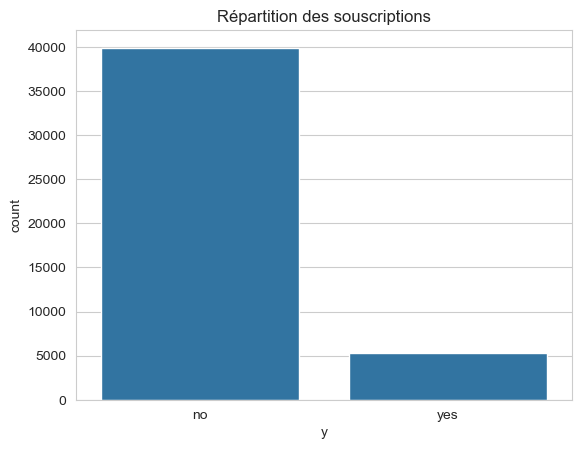

" \nAnalyse du graphe : \n\nLa variable cible présente un fort désiquilibre : seulement 11.7% des clients ont souscrit au dépôt à terme. C'est typique des campagnes de marketing réel.\nEDA devra donc se concentrer sur l'identification des caractéristiques spécifiques aux souscripteurs, en utilisant des visualisations basées sur des proportions et des distributions comparées.\n   --------------------------------\n- Peu de clients souscrivent donc il faut creuser le profil des 11.7% de souscripteurs : \nqui sont -ils ? (age , profession, situation familiale, niveau d'éducation)\nComment ont-ils été contactés ? (Mois, jour, type de contact, nombre d'appels ?)\nQuelle est leur situation financière ? (Solde, crédits, prêts ?)\n\n"

In [53]:
# Nombre de personnes ayant souscrit ou non 
nb_yes = (df['y'] == 'yes').sum()
nb_no = (df['y'] == 'no').sum()
total = len(df)
pct_yes = nb_yes / total * 100
pct_no = nb_no / total * 100
print(f"Clients YES : {nb_yes} ({pct_yes:.1f}%)")
print(f"Clients NO  : {nb_no} ({pct_no:.1f}%)")
sns.countplot(x='y', data=df)
plt.title("Répartition des souscriptions")
plt.show()

""" 
Analyse du graphe : 

La variable cible présente un fort désiquilibre : seulement 11.7% des clients ont souscrit au dépôt à terme. C'est typique des campagnes de marketing réel.
EDA devra donc se concentrer sur l'identification des caractéristiques spécifiques aux souscripteurs, en utilisant des visualisations basées sur des proportions et des distributions comparées.
   --------------------------------
- Peu de clients souscrivent donc il faut creuser le profil des 11.7% de souscripteurs : 
qui sont -ils ? (age , profession, situation familiale, niveau d'éducation)
Comment ont-ils été contactés ? (Mois, jour, type de contact, nombre d'appels ?)
Quelle est leur situation financière ? (Solde, crédits, prêts ?)

"""         

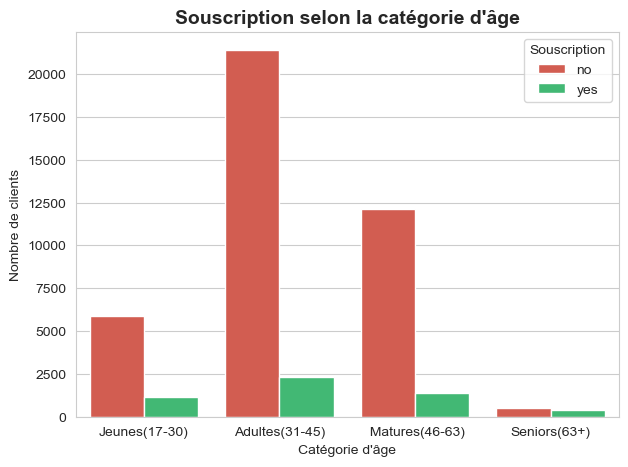

In [9]:
#Montrer si les souscripteurs sont plus jeunes ou plus âgés

df['age_group'] = pd.cut(
    df['age'],
    bins=[17, 30, 45, 63, 100],
    labels=['Jeunes(17-30)', 'Adultes(31-45)', ' Matures(46-63)', 'Seniors(63+)']
)
df[['age', 'age_group']].head()
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")

sns.countplot(
    x='age_group',
    hue='y',
    data=df,
    palette={'yes':'#2ecc71', 'no':'#e74c3c'}
)

plt.title("Souscription selon la catégorie d'âge", fontsize=14, weight='bold')
plt.xlabel("Catégorie d'âge")
plt.ylabel("Nombre de clients")
plt.legend(title="Souscription")
plt.show()

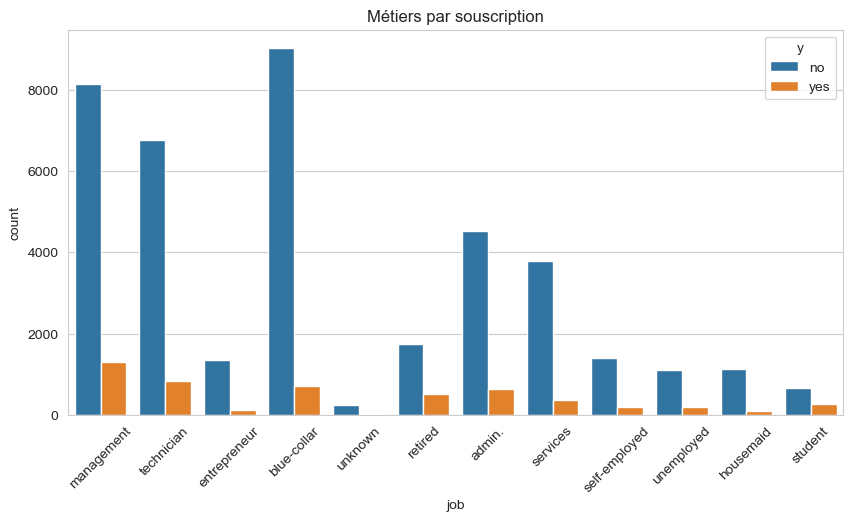

In [10]:
#montrer quels métiers sont les plus susceptibles de dire OUI au dépôt à terme.
plt.figure(figsize=(10,5))
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.title("Métiers par souscription")
plt.show()

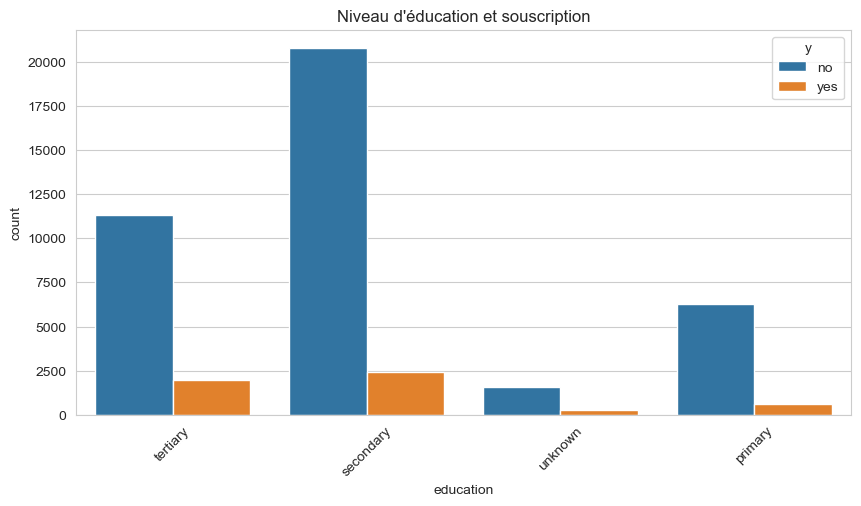

In [11]:
#montrer quels éductaions sont les plus susceptibles de dire OUI au dépôt à terme.
plt.figure(figsize=(10,5))
sns.countplot(x='education', hue='y', data=df)
plt.xticks(rotation=45)
plt.title("Niveau d'éducation et souscription")
plt.show()

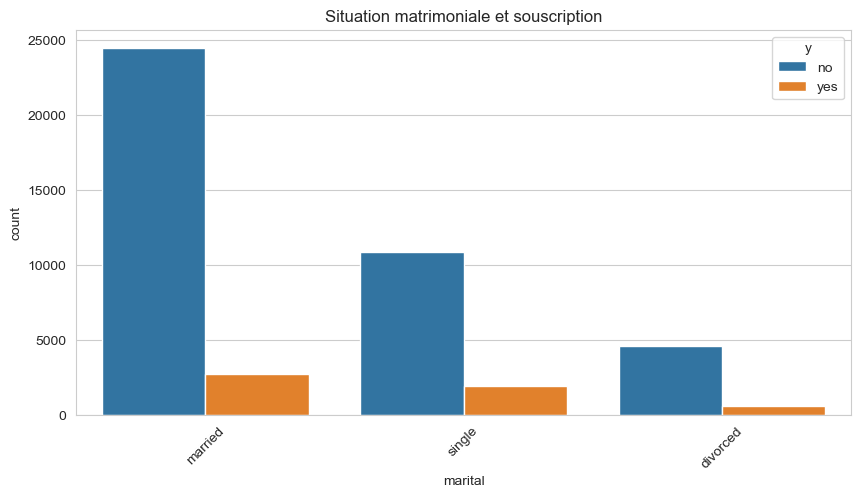

In [12]:
#montrer quels sont les situations matrimoniales les plus susceptibles de dire OUI au dépôt à terme.
plt.figure(figsize=(10,5))
sns.countplot(x='marital', hue='y', data=df)
plt.xticks(rotation=45)
plt.title("Situation matrimoniale et souscription")
plt.show()

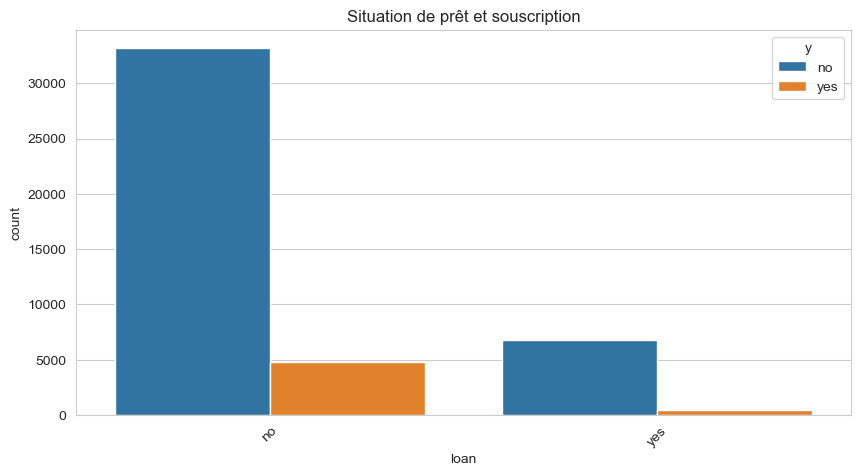

In [13]:
#montrer si les peronnes ayant un prêt sont les plus susceptibles de dire OUI au dépôt à terme.
plt.figure(figsize=(10,5))
sns.countplot(x='loan', hue='y', data=df)
plt.xticks(rotation=45)
plt.title("Situation de prêt et souscription")
plt.show()

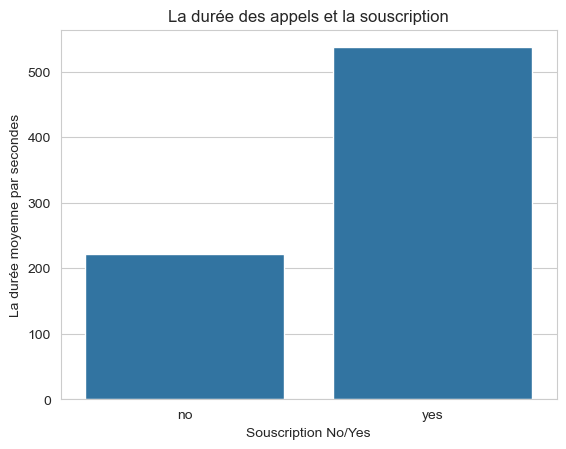

In [28]:
#montrer si la durée des appels impacte la souscription :

sns.barplot(x='y',y='duration',data=df, estimator='mean', errorbar= None)

plt.title("La durée des appels et la souscription")
plt.ylabel("La durée moyenne par secondes")
plt.xlabel("Souscription No/Yes")
plt.show()

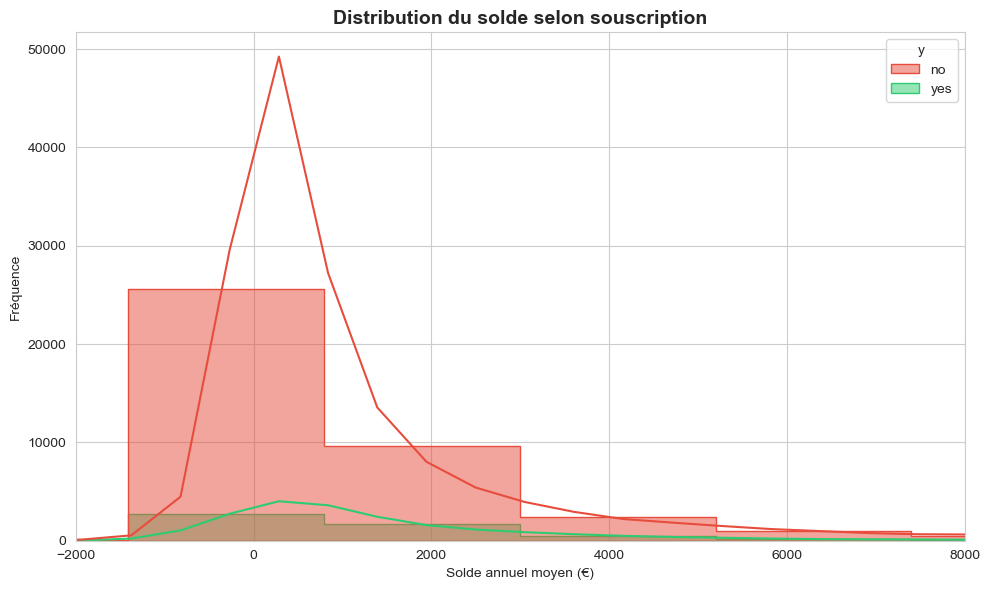

In [16]:
# la distribution de la balance (solde) selon souscription : 

plt.figure(figsize=(10, 6))

# Histogrammes superposés avec transparence et zoom
sns.histplot(
    data=df,
    x='balance',
    hue='y',
    kde=True,
    palette=['#e74c3c', '#2ecc71'],
    alpha=0.5,
    bins=50,
    element='step'  # Contour seulement pour meilleure lisibilité
)

plt.title("Distribution du solde selon souscription", fontsize=14, weight='bold')
plt.xlabel("Solde annuel moyen (€)")
plt.ylabel("Fréquence")
plt.xlim(-2000, 8000)  # ZOOM sur 98% des données

plt.tight_layout()
plt.show()


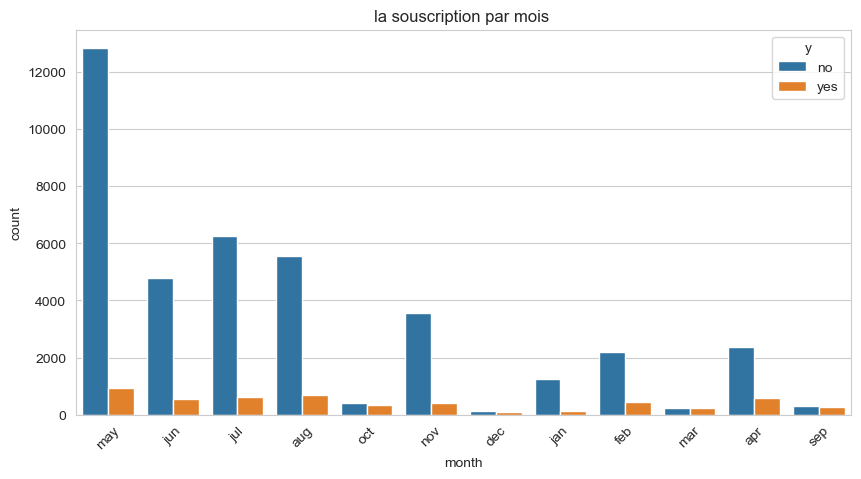

In [ ]:
# Présentation graphique de la souscription par mois : 
plt.figure(figsize=(10,5))
sns.countplot(x='month', hue='y', data=df)
plt.xticks(rotation=45)
plt.title("la souscription par mois ")
plt.show()

C:\Users\compte\AppData\Local\Temp\ipykernel_324\2101601069.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mois_conv = df.groupby('month')['y'].apply(lambda x: (x == 'yes').mean() * 100)
C:\Users\compte\AppData\Local\Temp\ipykernel_324\2101601069.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mois_conv.values, y=mois_conv.index, palette='coolwarm')


month
jan    10.121169
feb    16.647792
mar    51.991614
apr    19.679400
may     6.719454
jun    10.222805
jul     9.093546
aug    11.013286
sep    46.459413
oct    43.766938
nov    10.151134
dec    46.728972
Name: y, dtype: float64


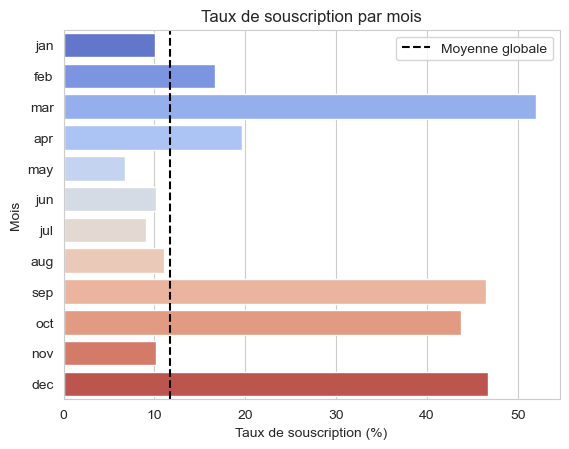

In [18]:
# taux de souscription par mois : 
# Barplot horizontal trié
# 1. Ordre chronologique des mois
mois_ordre = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
              'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# 2. Transformer la colonne month en catégorie ordonnée
df['month'] = pd.Categorical(df['month'], categories=mois_ordre, ordered=True)

# 3. Calculer le taux de souscription par mois (MOIS_CONV)
mois_conv = df.groupby('month')['y'].apply(lambda x: (x == 'yes').mean() * 100)

# 4. Vérifier le résultat
print(mois_conv)

# 5. Tracer le barplot horizontal trié
sns.barplot(x=mois_conv.values, y=mois_conv.index, palette='coolwarm')
plt.title("Taux de souscription par mois")
plt.xlabel("Taux de souscription (%)")
plt.ylabel("Mois")
plt.axvline(df['y'].eq('yes').mean() * 100, color='black', linestyle='--', label='Moyenne globale')
plt.legend()
plt.show()

In [22]:
# Remplacement des valeurs ('other', ' unknown') par la valeur ('no existant') :

df['poutcome']= df['poutcome'].replace (['other','unknown'], 'no existant')

df['poutcome']

0        no existant
1        no existant
2        no existant
3        no existant
4        no existant
            ...     
45206    no existant
45207    no existant
45208        success
45209    no existant
45210    no existant
Name: poutcome, Length: 45211, dtype: object

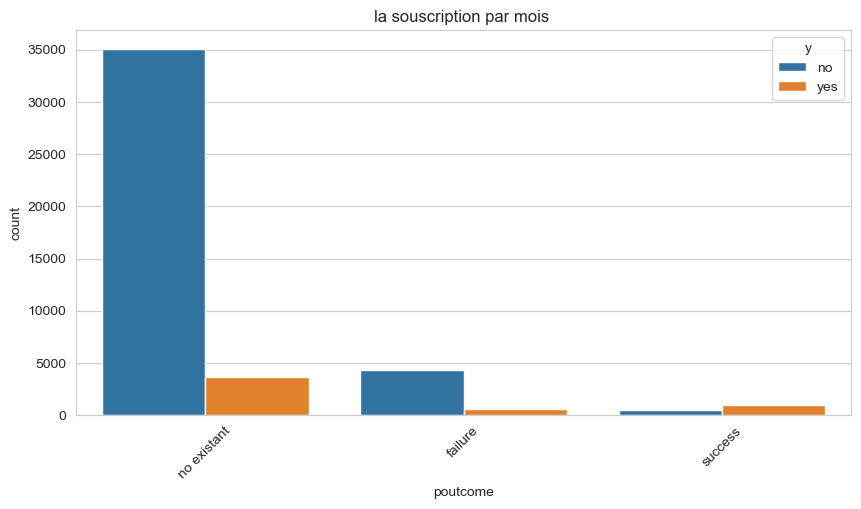

In [ ]:
# Présentation graphique de la souscription par rapport au résultat de la compagne précédente :
 
plt.figure(figsize=(10,5))
sns.countplot(x='poutcome', hue='y', data=df)
plt.xticks(rotation=45)
plt.title("l")
plt.show()